# log B violin plot

In [1]:
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import bilby
import corner

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from glob import glob

In [2]:
file_array_new = []
file_array_old = []
for time_duration in [5,12,24,36,49]:
    file=glob('outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_newlikelihood*.csv'%time_duration)[0]
    file_array_new.append(file)
    file=glob('outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_oldlikelihood*.csv'%time_duration)[0]
    file_array_old.append(file)
file_array_new_noise = []
file_array_old_noise = []
for time_duration in [5,12,24,36,49]:
    file=glob('outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_newlikelihood*.csv'%time_duration)[0]
    file_array_new_noise.append(file)
    file=glob('outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_oldlikelihood*.csv'%time_duration)[0]
    file_array_old_noise.append(file)
new_likelihood_logB_upper = []
new_likelihood_logB_lower = []
old_likelihood_logB_upper = []
old_likelihood_logB_lower = []
for file_new,file_old in zip(file_array_new_noise,file_array_old_noise):
	data = pd.read_csv(file_new)
	log_b = data["logB"]
	new_likelihood_logB_upper.append(np.percentile(log_b.values, 95))
	new_likelihood_logB_lower.append(np.percentile(log_b.values, 5))
	data = pd.read_csv(file_old)
	log_b = data["logB"]
	old_likelihood_logB_upper.append(np.percentile(log_b.values, 95))
	old_likelihood_logB_lower.append(np.percentile(log_b.values, 5))
new_likelihood_logB_upper = np.array(new_likelihood_logB_upper)
new_likelihood_logB_lower = np.array(new_likelihood_logB_lower)
old_likelihood_logB_upper = np.array(old_likelihood_logB_upper)
old_likelihood_logB_lower = np.array(old_likelihood_logB_lower)

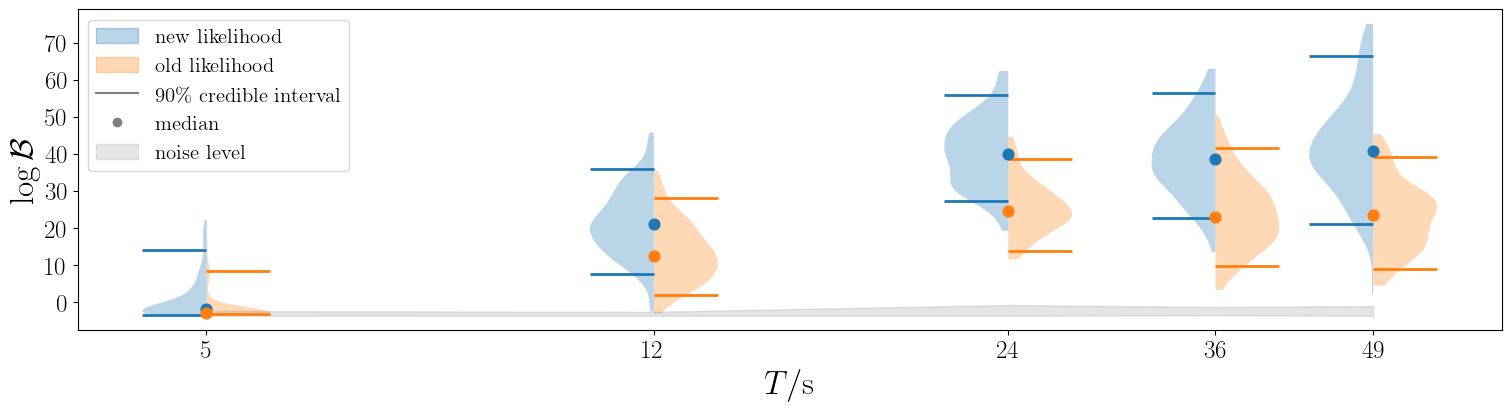

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize = (15,4),constrained_layout=True)
labels = []

duration_array = [5,12,24,36,49]

new_likelihood_logB = []
old_likelihood_logB = []
for file_new,file_old in zip(file_array_new,file_array_old):
    data = pd.read_csv(file_new)
    log_b = data["logB"]
    new_likelihood_logB.append(log_b.values)
    data = pd.read_csv(file_old)
    log_b = data["logB"]
    old_likelihood_logB.append(log_b.values)
parts1 = ax.violinplot(new_likelihood_logB,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
parts2 = ax.violinplot(old_likelihood_logB,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
quantile_values = [5, 95]
positions = np.log(duration_array)
for i, pos in enumerate(positions):
    lower1, upper1 = np.percentile(new_likelihood_logB[i], quantile_values)
    lower2, upper2 = np.percentile(old_likelihood_logB[i], quantile_values)
    ax.hlines([lower1, upper1], pos-0.25/2, pos, color='C0', lw=2)
    ax.hlines([lower2, upper2], pos, pos+0.25/2, color='C1', lw=2)
for pc in parts1['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, vertices[:, 0].mean())
for pc in parts2['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], vertices[:, 0].mean(),np.inf)

ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 18)
patch1 = mpatches.Patch(color=parts1["bodies"][0].get_facecolor().flatten(), label='new likelihood')
patch2 = mpatches.Patch(color=parts2["bodies"][0].get_facecolor().flatten(), label='old likelihood')
patch3 = mpatches.Patch(alpha=0.2, color='gray', label='noise level')
line1 = mlines.Line2D([], [], color='grey', label='90\% credible interval')
points1 = mlines.Line2D([], [], color='grey', marker='o',linestyle='None', label='median')

positions = np.log(duration_array)
medians1 = [np.median(x) for x in new_likelihood_logB]

ax.scatter(positions, medians1, marker='o', color=parts1["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)

medians2 = [np.median(x) for x in old_likelihood_logB]
ax.scatter(positions, medians2, marker='o', color=parts2["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)

ax.fill_between(np.log(duration_array), new_likelihood_logB_upper, new_likelihood_logB_lower, alpha=0.2, color='gray')
# ax.fill_between(np.log(duration_array), old_likelihood_logB_upper, old_likelihood_logB_lower, alpha=0.2, color='gray')
ax.set_xlabel(r'$T/\mathrm{s}$',fontsize = 24)
ax.set_ylabel(r'$\log \mathcal{B}$',fontsize = 24)

ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 18)

plt.yticks(fontsize = 18)
plt.legend(handles=[patch1, patch2, line1, points1,patch3], loc=2,fontsize = 15)
plt.grid(False)
plt.savefig('logB_violin_plot_divided.pdf',dpi=300)
plt.show()
plt.close()

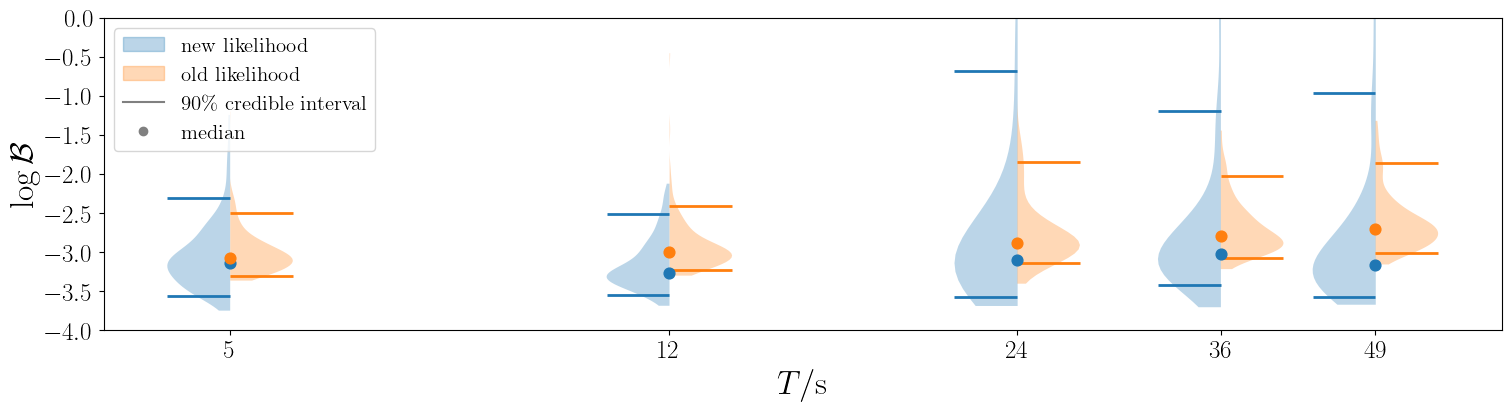

In [4]:
fig, ax = plt.subplots(figsize = (15,4),constrained_layout=True)
labels = []
duration_array = [5,12,24,36,49]

new_likelihood_logB = []
old_likelihood_logB = []
for file_new,file_old in zip(file_array_new_noise,file_array_old_noise):
    data = pd.read_csv(file_new)
    log_b = data["logB"]
    new_likelihood_logB.append(log_b.values)
    data = pd.read_csv(file_old)
    log_b = data["logB"]
    old_likelihood_logB.append(log_b.values)
parts1 = ax.violinplot(new_likelihood_logB,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
parts2 = ax.violinplot(old_likelihood_logB,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)

quantile_values = [5, 95]
positions = np.log(duration_array)
for i, pos in enumerate(positions):
    lower1, upper1 = np.percentile(new_likelihood_logB[i], quantile_values)
    lower2, upper2 = np.percentile(old_likelihood_logB[i], quantile_values)
    ax.hlines([lower1, upper1], pos-0.25/2, pos, color='C0', lw=2)
    ax.hlines([lower2, upper2], pos, pos+0.25/2, color='C1', lw=2)
for pc in parts1['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, vertices[:, 0].mean())
for pc in parts2['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], vertices[:, 0].mean(),np.inf)
ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 18)
patch1 = mpatches.Patch(color=parts1["bodies"][0].get_facecolor().flatten(), label='new likelihood')
patch2 = mpatches.Patch(color=parts2["bodies"][0].get_facecolor().flatten(), label='old likelihood')
patch3 = mpatches.Patch(alpha=0.2, color='gray', label='noise level')

line1 = mlines.Line2D([], [], color='grey', label='90\% credible interval')
points1 = mlines.Line2D([], [], color='grey', marker='o',linestyle='None', label='median')

positions = np.log(duration_array)
medians1 = [np.median(x) for x in new_likelihood_logB]

ax.scatter(positions, medians1, marker='o', color=parts1["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)

medians2 = [np.median(x) for x in old_likelihood_logB]
ax.scatter(positions, medians2, marker='o', color=parts2["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
ax.set_xlabel(r'$T/\mathrm{s}$',fontsize = 24)
ax.set_ylabel(r'$\log \mathcal{B}$',fontsize = 24)

ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 18)

ax.set_ylim(-4,0)

plt.yticks(fontsize = 18)
plt.legend(handles=[patch1, patch2, line1, points1], loc=2,fontsize = 15)
plt.grid(False)
plt.savefig('logB_violin_plot_noise_divided.pdf',dpi=300)
plt.show()
plt.close()

In [5]:
for file_new,file_old in zip(file_array_new_noise,file_array_old_noise):
    data = pd.read_csv(file_new)
    log_b = data["logB"]
    print(np.percentile(log_b.values, 95),np.max(log_b.values))
    print(np.partition(log_b, -10)[-10:])
    data = pd.read_csv(file_old)
    log_b = data["logB"]
    print(np.percentile(log_b.values, 95),np.max(log_b.values))
    print('-------------------------------------------------------------')

-2.30727669498658 -1.2417430444213648
[-2.37002668 -2.31497382 -2.30097905 -2.12249872 -2.01687516 -1.78194019
 -1.40132246 -1.91951709 -1.65856923 -1.24174304]
-2.5021938384950673 -1.2004363916671572
-------------------------------------------------------------
-2.504179447349501 -2.121645670900749
[-2.53104648 -2.51080409 -2.12164567 -2.49875928 -2.25351963 -2.4321022
 -2.26277209 -2.29274381 -2.4006368  -2.29935216]
-2.404496972288905 -0.4511445674300975
-------------------------------------------------------------
-0.6739058477693403 7.169892231887241
[-1.33396302  1.34663355 -0.42438594  3.27352655 -0.19080813  7.16989223
  5.52576978 -0.97887462  0.59992231 -0.41181711]
-1.8414014284680384 2.032496881778458
-------------------------------------------------------------
-1.1877867112717482 3.0878059020502
[-1.28099364 -1.25674143 -1.13136922  3.0878059   0.0827332   0.76377447
  1.63432824  0.03585927 -0.97516086 -0.47028443]
-2.02765812208349 -1.441834292853312
-------------------

# SNR and $\tau \Delta f$ violin plot

## SNR theory trend

In [6]:
################## import packages #############################
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
# If you do not understand the lines above, ignore it.

import numpy as np
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d
# import matplotlib.pyplot as plt
import bilby
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from gwosc.locate import get_event_urls
from gwpy.signal import filter_design
import os
from bilby.core.prior import PriorDict


import sys

sys.path.append("..")
from modular_code_part.burstevidence_newcomb import burstevidence2_old_response as burstevidence_old
from modular_code_part.burstevidence_newcomb import burstevidence2_qnm_response as burstevidence
from modular_code_part.comb_models_version3 import qnmcombmodel_cut as combmodel
from modular_code_part.notch import NotchFilterProcessor as NotchFilterProcessor
from modular_code_part.detresponse import RIeff as RIeff

################################################# define functions #########################################################
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)
    hf = np.fft.rfft(strain)
    norm = 1
    white_hf = hf / np.sqrt(interp_psd(freqs)) * norm
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

def dimention2to1(i,j):
    temp = max(i-1,j-1)
    return temp**2+i+(temp-j)+1
    ## transform ij to i,j, note that the first item is numbered 1

def dimention1to2(ij_input):
    ij = ij_input-1
    temp = int(np.sqrt(ij))
    #part = temp*2+1
    #n = ij - temp**2 +1
    ## temp represents the largest number in the group
    ## part = temp*2+1 represents the total number of elements in the group
    ## n = ij - temp**2 +1 represents the position in the group
    minus = ij - temp**2 - temp  ##j-i = n - temp-1
    if minus==0:
        j = temp
        i = temp
    elif minus>0:
        i = temp
        j = temp-minus
    else:
        j =temp
        i = temp+minus
    return (i+1,j+1)
################################################# define functions end #####################################################

################################################# parameter setting #########################################################
# nlh = tem
# deltalh = 5
lhi = 0
lhf = 150

# lhi = deltah*nlh
# lhf = deltalh*nlh+deltalh
##See lhlistnew

## 0: old likelihood; 1: new likelihood
# likelihood_index = tem

## 0: create a new csv with header; 1: write in the existing csv
# whether_print_header = tem
# nduration = tem
inject_index = 0

injectlist = ['notch', 'inject']
inject_string = injectlist[inject_index]

likelihoodlist = ['oldlikelihood','newlikelihood']
# likelihood_string = likelihoodlist[likelihood_index]

eventname = 'GW150914'

echoamplitude = 6.4e-20
# if inject_index == 0:
#     echoamplitude = 0
tlag = 7.4*1e-3
durationlist = np.array([48.6, 36.5, 24.3, 12.1, 4.9]) # benchmarks of time duration in unit of second
signallist = ['time48.npy','time36.npy','time24.npy','time12.npy','time5.npy']
chi = 0.67
f_RD = (1.5251-1.1568*(1-chi)**0.129)/(2*np.pi)
R_bar = 0.00547/(1+1/np.sqrt(1-chi**2))
G = 6.67430e-11
c = 299792458
M_sun = 1.988409870698051e30
finalmass_150914 = 61.5
## 61.5 M_sun is the final mass of the binary system, which is the source-frame mass
## M f_RD is dimensionless, to convert to Hz, we need to use:
## G M f_RD /c^3 = 1.5251-1.1568*(1-chi)**0.129


f_RD = f_RD * c**3 / G / M_sun /finalmass_150914
R_bar = R_bar * c**3 / G / M_sun / finalmass_150914
## f_RD,R_bar =  274.50202917591366, 7.693779311787322



gps = 1126259462.4 # roughly the main event time
fnameH = 'H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'
fnameL = 'L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'

## background estimation parameters (use noise prior to the main event in [gps-t0-n*duration,gps-t0])
t0 = 250 # in unit of second
n = 25 # the number of duration


resampti = 1
resdti = tlag
resph01 = -0.5*np.pi
resph02 = 1.5*np.pi
f_minimal = 50

## psd setting
samplingrate = 4096
dt = 1/samplingrate # time resolution in unit of second
NFFT = int(0.5 / dt) # the segment length is 0.5s
fs = int(1/ dt)
psd_window = np.blackman(NFFT)
NOVL = int(NFFT/2)
psd_params = {
    'Fs': fs,
    'NFFT': NFFT,
    'window': psd_window,
    'noverlap': NOVL
    }

##notch out setting
notchout_list_l_large = np.array([60,2*60,3*60,4*60]) #The frequency center for notching out
notchout_list_errorbar_l_large = np.array([0.06,2*0.06,3*0.06,4*0.06])#The frequency error bar for notching out
notchout_list_h_large = np.array([60,2*60,3*60,4*60] )#The frequency center for notching out
notchout_list_errorbar_h_large =np.array([0.06,2*0.06,3*0.06,4*0.06]) #The frequency error bar for notching out
notchout_list_l_small = np.array([73.9,122.2,147.8,170.5,196.1,244.4,267.1]) #The frequency center for notching out
notchout_list_errorbar_l_small = np.array([0.03,0.03,0.03,0.03,0.03,0.03,0.03])#The frequency error bar for notching out
notchout_list_h_small = np.array([64,128,160,192,256,272])#The frequency center for notching out
notchout_list_errorbar_h_small =np.array([0.03,0.03,0.03,0.03,0.03,0.03]) #The frequency error bar for notching out

notchout_list_l = np.concatenate((notchout_list_l_large, notchout_list_l_small), axis = 0)
notchout_list_h = np.concatenate((notchout_list_h_large, notchout_list_h_small), axis = 0)
notchout_list_errorbar_l = np.concatenate((notchout_list_errorbar_l_large, notchout_list_errorbar_l_small), axis = 0)
notchout_list_errorbar_h = np.concatenate((notchout_list_errorbar_h_large, notchout_list_errorbar_h_small), axis = 0)

notchout_errorbar_for_likelihood = [-0.3,0.3]
notchout_errorbar_for_psd = [-2,2]

notchout_amplitude_list = [6,6,5,5,5] #The normalized strain data in frequency domain higher than this parameter will be outched out.
croptime = 1 # in unit of second

## sampler setting
npoints = 1000
# nact = 10# up to now, we do not use this parameter yet
maxmcmc = 10000
walks = 100

# LVK arm unit vectors
uL=np.array([-0.95457412153, -0.14158077340, -0.26218911324])
vL=np.array([0.29774156894, -0.48791033647, -0.82054461286])
uH=np.array([-0.22389266154, 0.79983062746, 0.55690487831])
vH=np.array([-0.91397818574, 0.02609403989, -0.40492342125])
uV=np.array([-0.70045821479,0.20848948619,0.68256166277])
vV=np.array([-0.05379255368,-0.96908180549,0.24080451708])

xH=np.array([-2.16141492636*1e6, -3.83469517889*1e6, 4.6003502264*1e6])
xL=np.array([-7.42760447238*1e4, -5.49628371971*1e6, 3.22425701744*1e6])
xV=np.array([4.54637409900*1e6,8.42989697626*1e5,4.37857696241*1e6])

rai, dei ,GMSTi = 1.6768742520431272, -1.2148064804269771, 9.383265080483397
psii = 0
phi0i = 0
Aplusi = 1
Acrossi = 0
## dry run setting
# npoints = 10
# nact = 1
# maxmcmc = 100
# walks = 1


# nduration = 1
# for nduration in [0]:
snr_array = []
for nduration in [0,1,2,3,4][::-1]:
# for nduration in [0]:
    duration = int(durationlist[nduration]/dt)*dt # time duration in unit of second
    notchout_amplitude = notchout_amplitude_list[nduration]
    Nt = int(duration/dt) # strain data timeseries length
    df=1/duration

    frequency_shift = np.arange(0,int(1/dt),df) - samplingrate/2
    echoraw0 = np.load('./signal/'+signallist[nduration])
    echoraw = echoamplitude*echoraw0
    fre_echo_raw = np.fft.fft(echoraw)
    fre_echo_raw_shift = np.fft.fftshift(fre_echo_raw)

    RHeff = RIeff(rai, dei, psii, Aplusi, Acrossi, phi0i, GMSTi, uH, vH, xH, frequency_shift)
    RLeff = RIeff(rai, dei, psii, Aplusi, Acrossi, phi0i, GMSTi, uL, vL, xL, frequency_shift)

    echorawfre_H = np.fft.fftshift(RHeff * fre_echo_raw_shift + np.conjugate(RHeff * fre_echo_raw_shift)[::-1])/2
    echorawfre_L = np.fft.fftshift(RLeff * fre_echo_raw_shift + np.conjugate(RLeff * fre_echo_raw_shift)[::-1])/2

    # echoraw_H=np.fft.ifft(echorawfre_H)
    echoraw_H = np.fft.irfft(echorawfre_H[0:Nt//2+1])
    echoraw_L = np.fft.irfft(echorawfre_L[0:Nt//2+1])
    if len(echoraw_H) != Nt:
        echoraw_H = np.append(echoraw_H,0)
        echoraw_L = np.append(echoraw_L,0)

    frequency = np.arange(0,int(1/dt/2),df)

    ## directory


    # widthi = 11/duration # teeth width in unit of Hz
    # ampti2 = 5*1e-23/np.sqrt(4*df) # from normalization 5*ASD*sqrt(4*df)
    ################################################ strain data setting ####################################################
    strainLall = TimeSeries.read('./noise/'+fnameL,format='hdf5.gwosc',start=gps-t0-n*duration-duration, end=gps-t0+duration)
    strainHall = TimeSeries.read('./noise/'+fnameH,format='hdf5.gwosc',start=gps-t0-n*duration-duration, end=gps-t0+duration)

    Lpart=np.split(strainLall,n+2)
    Hpart=np.split(strainHall,n+2)
    Lpart.reverse()
    Hpart.reverse()

    lhlist = np.arange(1,544)#the number 544 can result in the length of lhlistnew equal to 52*10
    lhlist2d = [dimention1to2(lh) for lh in lhlist]
    lhlistnew = np.array([l!=h for l,h in lhlist2d])*lhlist
    lhlistnew = lhlistnew[lhlistnew!=0]



    lh = lhlistnew[0]


    indexl,indexh = dimention1to2(lh)

    noiseL = Lpart[indexl]
    noiseH = Hpart[indexh]

    noiseLp = (np.concatenate((Lpart[indexl+1],Lpart[indexl],Lpart[indexl-1])))
    noiseHp = (np.concatenate((Hpart[indexh+1],Hpart[indexh],Hpart[indexh-1])))

    strainL = noiseL + echoraw_L
    strainH = noiseH + echoraw_H
    strainLp = noiseLp + np.concatenate((np.zeros(Nt),echoraw_L,np.zeros(Nt)),axis=0)
    strainHp = noiseHp + np.concatenate((np.zeros(Nt),echoraw_H,np.zeros(Nt)),axis=0)
    ################################################ generate origin data ##################################################
    Pxx_strainL_origin, freqs = mlab.psd(strainL, Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)
    psd_strainL_origin = interp1d(freqs, Pxx_strainL_origin)
    Pxx_strainH_origin, freqs = mlab.psd(strainH, Fs = fs, NFFT = NFFT, window=psd_window, noverlap=NOVL)
    psd_strainH_origin = interp1d(freqs, Pxx_strainH_origin)

    noiseLpW_origin = whiten(noiseLp, psd_strainL_origin, dt)
    noiseHpW_origin = whiten(noiseHp, psd_strainH_origin, dt)
    noisefreL_origin = dt * np.fft.fft(noiseLpW_origin[Nt:(2*Nt)])[0:len(frequency)]*np.sqrt(psd_strainL_origin(frequency))
    noisefreH_origin = dt * np.fft.fft(noiseHpW_origin[Nt:(2*Nt)])[0:len(frequency)]*np.sqrt(psd_strainH_origin(frequency))

    strainLpW_origin = whiten(strainLp, psd_strainL_origin, dt)
    strainHpW_origin = whiten(strainHp, psd_strainH_origin, dt)
    strainLfre_origin = dt * np.fft.fft(strainLpW_origin[Nt:(2*Nt)])[0:len(frequency)]*np.sqrt(psd_strainL_origin(frequency))
    strainHfre_origin = dt * np.fft.fft(strainHpW_origin[Nt:(2*Nt)])[0:len(frequency)]*np.sqrt(psd_strainH_origin(frequency))
    strainLfre_normalized_abs_origin = np.abs(strainLfre_origin/(np.sqrt(psd_strainL_origin(frequency)/(4*df))))
    strainHfre_normalized_abs_origin = np.abs(strainHfre_origin/(np.sqrt(psd_strainH_origin(frequency)/(4*df))))

    processor = NotchFilterProcessor(frequency=frequency, samplingrate=samplingrate, df=df, psd_params=psd_params)

    filteredL, strainLpW, psd_strainL, whether_include_in_likelihood_l,  total_notchlist_l , total_croptime_l= processor.process(
        strainLp, Nt, samplingrate, notchout_amplitude, notchout_list_l, notchout_list_errorbar_l, notchout_errorbar_for_psd, notchout_errorbar_for_likelihood, croptime
    )
    filteredH, strainHpW, psd_strainH, whether_include_in_likelihood_h,  total_notchlist_h , total_croptime_h= processor.process(
        strainHp, Nt, samplingrate, notchout_amplitude, notchout_list_h, notchout_list_errorbar_h, notchout_errorbar_for_psd, notchout_errorbar_for_likelihood, croptime
    )
    total_croptime = np.max([total_croptime_l, total_croptime_h])

    noiseLpW = whiten(processor.apply_notch_filters(noiseLp, total_notchlist_l, total_croptime),psd_strainL, dt)
    noiseHpW = whiten(processor.apply_notch_filters(noiseHp, total_notchlist_h, total_croptime),psd_strainH ,dt)
    noiseLfre = dt * np.fft.fft(noiseLpW[(Nt-samplingrate*total_croptime):(2*Nt-samplingrate*total_croptime)])[0:len(frequency)]*np.sqrt(psd_strainL(frequency))
    noiseHfre = dt * np.fft.fft(noiseHpW[(Nt-samplingrate*total_croptime):(2*Nt-samplingrate*total_croptime)])[0:len(frequency)]*np.sqrt(psd_strainH(frequency))
    noiseLfre = noiseLfre.value
    noiseHfre = noiseHfre.value

    strainLfre = dt * np.fft.fft(strainLpW[(Nt-samplingrate*total_croptime):(2*Nt-samplingrate*total_croptime)])[0:len(frequency)]*np.sqrt(psd_strainL(frequency))
    strainHfre = dt * np.fft.fft(strainHpW[(Nt-samplingrate*total_croptime):(2*Nt-samplingrate*total_croptime)])[0:len(frequency)]*np.sqrt(psd_strainH(frequency))

    strainLfre_normalized_abs = np.abs(strainLfre/(np.sqrt(psd_strainL(frequency)/(4*df))))
    strainHfre_normalized_abs = np.abs(strainHfre/(np.sqrt(psd_strainH(frequency)/(4*df))))
    strainLfre = strainLfre.value
    strainHfre = strainHfre.value

    echo_fre_H = dt*np.fft.fft(echoraw_H)[0:len(frequency)]
    echo_fre_L = dt*np.fft.fft(echoraw_L)[0:len(frequency)]

    fmin_m = f_minimal
    fmax_m = f_RD
    frequencye_m = frequency[int(fmin_m/df):int(fmax_m/df+2)]
    res_amplitude_m = 1

    rho_inj = np.sqrt(4*df * np.sum(np.abs(echo_fre_H[int(fmin_m/df):int(fmax_m/df+2)])**2/psd_strainH_origin(frequencye_m)) +  4*df * np.sum((res_amplitude_m*np.abs(echo_fre_L[int(fmin_m/df):int(fmax_m/df+2)]))**2/psd_strainL_origin(frequencye_m)))
    snr_array.append(rho_inj)
    print('duration = %fs, snr = %f'%(duration,rho_inj))

0
Iteration 1: [60.0, 180.0]
1
0
Iteration 1: [60.0]
1
Iteration 2: [180.0]
2
duration = 4.899902s, snr = 11.585970
0
Iteration 1: [60.0, 180.0, 73.9]
1
0
Iteration 1: [60.0, 120.0, 180.0]
1
duration = 12.099854s, snr = 14.613377
0
Iteration 1: [60.0, 180.0, 73.9, 244.4]
1
0
Iteration 1: [60.0, 120.0, 180.0]
1
duration = 24.299805s, snr = 16.513267
0
Iteration 1: [60.0, 180.0, 73.9]
1
0
Iteration 1: [60.0, 120.0, 180.0, 128.0, 256.0]
1
duration = 36.500000s, snr = 17.230795
0
Iteration 1: [60.0, 180.0, 73.9, 244.4]
1
0
Iteration 1: [60.0, 120.0, 180.0, 128.0]
1
duration = 48.599854s, snr = 17.475526


## inject

In [7]:
duration_array = [5,12,24,36,49]

In [8]:
file_array_new_2d = [sorted(glob('./outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_new*/*_SNR_result.json'%duration_array[nduration])) for nduration in [0,1,2,3,4]]
file_array_old_2d = [sorted(glob('./outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_old*/*_SNR_result.json'%duration_array[nduration])) for nduration in [0,1,2,3,4]]

In [9]:
new_likelihood_SNR = []
old_likelihood_SNR = []
new_likelihood_qfactor = []
old_likelihood_qfactor = []
log10_new_likelihood_qfactor = []
log10_old_likelihood_qfactor = []

for file_array_new_2,file_array_old_2 in zip(file_array_new_2d,file_array_old_2d):
    # quantiles8 = [[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95]]
    # quantiles7 = [[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95]]


    file_array_new_2 = file_array_new_2
    file_array_old_2 = file_array_old_2

    posterior_array_new = [bilby.result.read_in_result(result_single).posterior for result_single in file_array_new_2]
    posterior_array_old = [bilby.result.read_in_result(result_single).posterior for result_single in file_array_old_2]
    posterior_array_allplus_new = pd.concat(posterior_array_new,ignore_index=True)
    posterior_array_allplus_old = pd.concat(posterior_array_old,ignore_index=True)
    new_likelihood_SNR.append(posterior_array_allplus_new['SNR'])
    old_likelihood_SNR.append(posterior_array_allplus_old['SNR'])
    qfactor_new = posterior_array_allplus_new['spacing']/posterior_array_allplus_new['width']
    qfactor_old = posterior_array_allplus_old['spacing']/posterior_array_allplus_old['width']

    new_likelihood_qfactor.append(qfactor_new)
    old_likelihood_qfactor.append(qfactor_old)
    # new_likelihood_qfactor.append(posterior_array_allplus_new['spacing']/posterior_array_allplus_new['width'])
    # old_likelihood_qfactor.append(posterior_array_allplus_old['spacing']/posterior_array_allplus_old['width'])

    # log10_new_likelihood_qfactor.append(np.log10(posterior_array_allplus_new['spacing']/posterior_array_allplus_new['width']))
    # log10_old_likelihood_qfactor.append(np.log10(posterior_array_allplus_old['spacing']/posterior_array_allplus_old['width']))
    log10_new_likelihood_qfactor.append(np.log10(qfactor_new))
    log10_old_likelihood_qfactor.append(np.log10(qfactor_old))


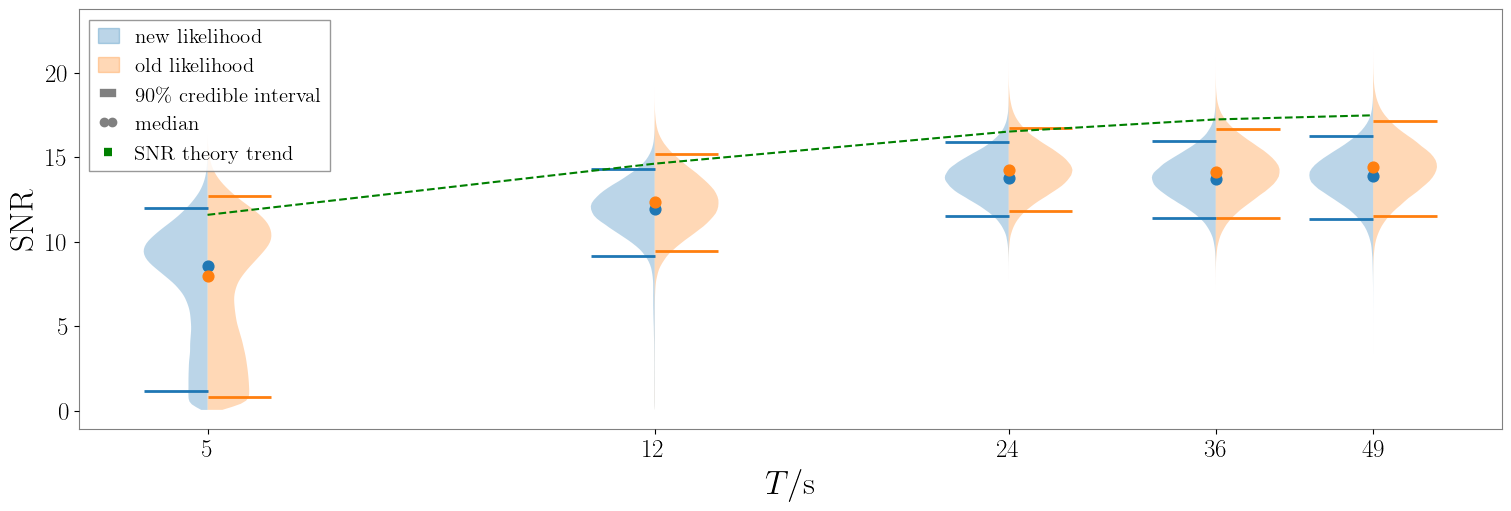

In [10]:

fig, ax = plt.subplots(figsize = (15,5),constrained_layout=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
labels = []
parts1 = ax.violinplot(new_likelihood_SNR,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
parts2 = ax.violinplot(old_likelihood_SNR,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
quantile_values = [5, 95]
positions = np.log(duration_array)
for i, pos in enumerate(positions):
    lower1, upper1 = np.percentile(new_likelihood_SNR[i], quantile_values)
    lower2, upper2 = np.percentile(old_likelihood_SNR[i], quantile_values)
    ax.hlines([lower1, upper1], pos-0.25/2, pos, color='C0', lw=2)
    ax.hlines([lower2, upper2], pos, pos+0.25/2, color='C1', lw=2)
for pc in parts1['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, vertices[:, 0].mean())

for pc in parts2['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], vertices[:, 0].mean(),np.inf)

ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 18)

patch1 = mpatches.Patch(color=parts1["bodies"][0].get_facecolor().flatten(), label='new likelihood')
patch2 = mpatches.Patch(color=parts2["bodies"][0].get_facecolor().flatten(), label='old likelihood')
#patch3 = mpatches.Patch(alpha=0.2, color='gray', label='noise level')
#patch2 = mpatches.Patch(color='C1', label='oldlikelihood')
line1 = mlines.Line2D([], [], color='grey', label='90\% credible interval')
points1 = mlines.Line2D([], [], color='grey', marker='o',linestyle='None', label='median')

line3 = mlines.Line2D([], [], color='green',ls='--', label='SNR theory trend')
#ax.axhline(-2.5,color = 'r',ls = '--',label = 'noise level')
positions = np.log(duration_array)
medians1 = [np.median(x) for x in new_likelihood_SNR]
#medians1= np.percentile(new_likelihood_logB, 50, axis=1)
ax.scatter(positions, medians1, marker='o', color=parts1["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
#medians2 = np.percentile(old_likelihood_logB, 50, axis=1)
medians2 = [np.median(x) for x in old_likelihood_SNR]
ax.scatter(positions, medians2, marker='o', color=parts2["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
ax.plot(positions,snr_array,color = 'green',ls = '--',label = 'SNR theory trend')
ax.set_xlabel(r'$T/\mathrm{s}$',fontsize = 24)
ax.set_ylabel(r'SNR',fontsize = 24)
# ax.text(0.5, 0.9, name_string, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize = 24)
# ax.set_yscale('log')
plt.yticks(fontsize = 18)
plt.legend(handles=[patch1, patch2, line1, points1, line3], loc=2,fontsize = 15)
plt.grid(False)
plt.savefig('SNR_violinplot_divided_wider.pdf',dpi=300)
plt.show()
plt.close()

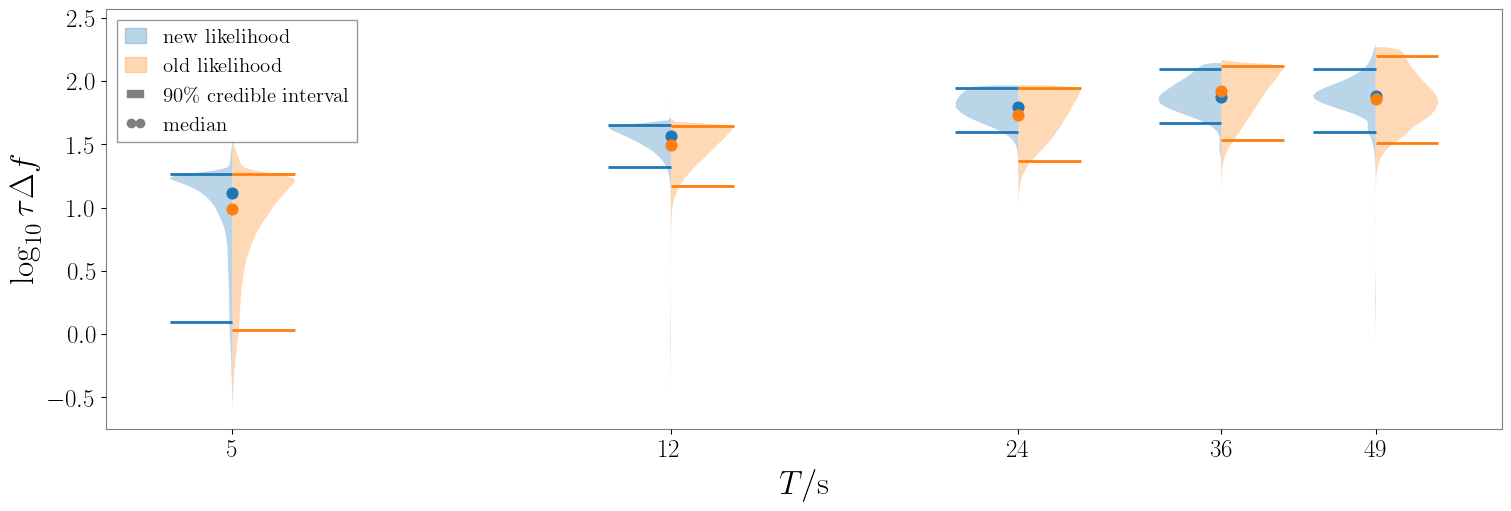

In [11]:
fig, ax = plt.subplots(figsize = (15,5),constrained_layout=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
labels = []
parts1 = ax.violinplot(log10_new_likelihood_qfactor,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
parts2 = ax.violinplot(log10_old_likelihood_qfactor,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
quantile_values = [5, 95]
positions = np.log(duration_array)
for i, pos in enumerate(positions):
    lower1, upper1 = np.percentile(log10_new_likelihood_qfactor[i], quantile_values)
    lower2, upper2 = np.percentile(log10_old_likelihood_qfactor[i], quantile_values)
    ax.hlines([lower1, upper1], pos-0.25/2, pos, color='C0', lw=2)
    ax.hlines([lower2, upper2], pos, pos+0.25/2, color='C1', lw=2)
for pc in parts1['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, vertices[:, 0].mean())

for pc in parts2['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], vertices[:, 0].mean(),np.inf)

ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 18)

patch1 = mpatches.Patch(color=parts1["bodies"][0].get_facecolor().flatten(), label='new likelihood')
patch2 = mpatches.Patch(color=parts2["bodies"][0].get_facecolor().flatten(), label='old likelihood')
#patch3 = mpatches.Patch(alpha=0.2, color='gray', label='noise level')
#patch2 = mpatches.Patch(color='C1', label='oldlikelihood')
line1 = mlines.Line2D([], [], color='grey', label='90\% credible interval')
points1 = mlines.Line2D([], [], color='grey', marker='o',linestyle='None', label='median')

line3 = mlines.Line2D([], [], color='green',ls='--', label='SNR theory trend')
#ax.axhline(-2.5,color = 'r',ls = '--',label = 'noise level')
positions = np.log(duration_array)
medians1 = [np.median(x) for x in log10_new_likelihood_qfactor]
#medians1= np.percentile(new_likelihood_logB, 50, axis=1)
ax.scatter(positions, medians1, marker='o', color=parts1["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
#medians2 = np.percentile(old_likelihood_logB, 50, axis=1)
medians2 = [np.median(x) for x in log10_old_likelihood_qfactor]
ax.scatter(positions, medians2, marker='o', color=parts2["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
# ax.plot(positions,snr_array[::-1],color = 'green',ls = '--',label = 'SNR theory trend')
ax.set_xlabel(r'$T/\mathrm{s}$',fontsize = 24)
ax.set_ylabel(r'$\log_{10} \tau \Delta f$',fontsize = 24)
# ax.text(0.5, 0.9, name_string, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize = 24)
# ax.set_yscale('log')
plt.yticks(fontsize = 18)
plt.legend(handles=[patch1, patch2, line1, points1], loc=2,fontsize = 15)
plt.grid(False)
plt.savefig('qfactor_violinplot_divided_wider.pdf',dpi=300)
plt.show()
plt.close()

# compare notch

In [12]:
from glob import glob
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def draw_horizontal_split_violin_fixed(ax, data_t, data_b, pos, color_t, color_b,  bins_t=30, bins_b=30, bandwidth_t='scott', bandwidth_b='scott'):
    datasets = [data_t, data_b]
    sides = [1, -1]
    colors = [color_t, color_b]
    bins_all = [bins_t, bins_b]
    bandwidths = [bandwidth_t, bandwidth_b]
    heights = [0.5, 0.4]
    # labels = [label_t, label_b]

    # for data, side, color, label in zip(datasets, sides, colors, labels):
    for data, side, color, bins, bandwidth,height in zip(datasets, sides, colors, bins_all, bandwidths, heights):
        kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
        x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
        density = kde(x_range)

        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = np.diff(bin_edges)

        scale_factor = 0.4 / density.max() # scale KDE and hist
        ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
               color=color, alpha=0.4, edgecolor=None, zorder=1)
        # ax.fill_between(x_range, pos, pos + side * density * scale_factor,
        #                 color=color, alpha=0.4,  zorder=2)
        ax.plot(x_range, pos + side * density * scale_factor, color=color, lw=1.2, zorder=3)

        median_val = np.mean(data)
        ax.vlines(median_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)

        va_type = 'bottom' if side > 0 else 'top'
        offset_x = 0.4
        offset_y = -1 * side * 0.15
        ax.text(
            x=median_val + offset_x,
            y=pos + side * height + offset_y,
            s=f"{median_val:.2f}",
            color=color,
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va=va_type,
            zorder=6
        )


In [13]:
file_list = glob("outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/*24*.csv")
file_list.sort()
tem = glob("outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/*24*.csv")
tem.sort()
file_list= file_list + tem
tem = glob("outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/*49*.csv")
tem.sort()
file_list= file_list + tem
tem = glob("outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/*49*.csv")
tem.sort()
file_list= file_list + tem
file_list = file_list[4::]
file_list

['outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=49_newlikelihood_all.csv',
 'outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=49_oldlikelihood_all.csv',
 'outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=49_newlikelihood_all.csv',
 'outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=49_oldlikelihood_all.csv']

In [14]:
colorlist = ['C0',"C1","gray","gray",'C0',"C1","gray","gray",]

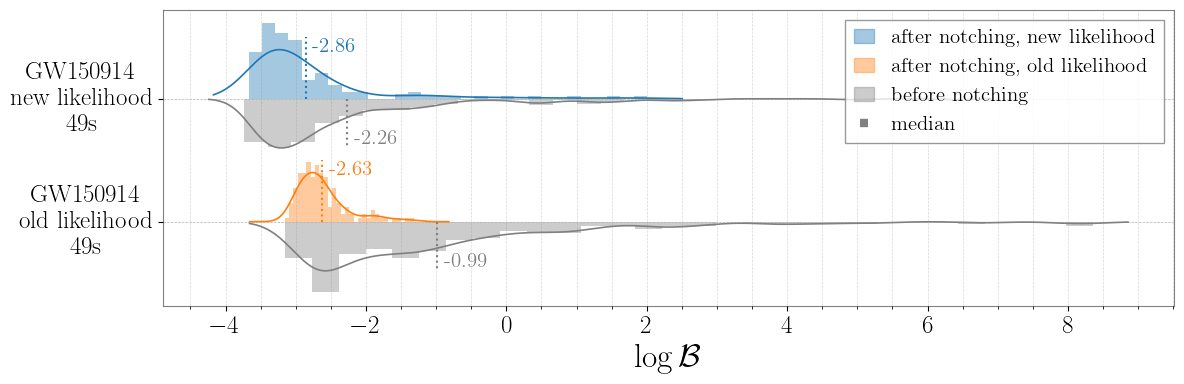

In [15]:
num_pairs = len(file_list) // 2
# fig, ax = plt.subplots(figsize=(12, 2 * num_pairs))


from matplotlib.ticker import FixedLocator
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(12, 2 * num_pairs))
y_pos = num_pairs
for i in [0,1]:
# for i in [0]:
    index_notch = i
    index_nonotch = i + 2
    draw_horizontal_split_violin_fixed(
        ax,
        pd.read_csv(file_list[index_notch])["logB"],
        pd.read_csv(file_list[index_nonotch])["logB"],
        pos=y_pos,
        color_t=colorlist[index_notch], color_b=colorlist[index_nonotch],
        bins_b=30, bandwidth_b=0.15
        # label_t=labellist[index_notch], label_b=labellist[index_nonotch]
    )
    y_pos -= 1
ax.set_yticks(range(1, num_pairs + 1))
ax.grid(axis='y', linestyle='--', alpha=1)
ax.xaxis.set_minor_locator(FixedLocator(np.arange(-5,10,0.5)))
ax.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)

labels = [
    # 'GW150914 \n oldlikelihood \n 49s',
    # 'GW150914 \n newlikelihood \n 49s',
    'GW150914 \n old likelihood \n 49s',
    'GW150914 \n new likelihood \n 49s'
]
ax.set_yticklabels(labels, fontsize=18, ha='right', va='center')
for label in ax.get_yticklabels():
    label.set_multialignment('center')

ax.set_xlabel(r'$\log \mathcal{B}$',fontsize = 24)
patch1 = mpatches.Patch(color='C0', alpha=0.4, label='after notching, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='after notching, old likelihood')
patch3 = mpatches.Patch(color='gray', alpha=0.4, label='before notching')
line1 = mlines.Line2D([], [], color='gray', linestyle=':', label='median')
plt.legend(handles=[patch1, patch2, patch3, line1], loc=1,fontsize = 15)
plt.xticks(fontsize = 18)
plt.tight_layout()
plt.savefig("comparison_logB_notch_49.pdf")
plt.show()